#  Factors Influencing Loan Completion
##  *by OLAMIDE QUZEEM .O*

## Investigation Overview

In This Presentation ,I will be Looking to see The variables that are pivotal in a Borrowers Completing their loan.
    Variables Such as Recommendations,DebtToIncomeratio, IsBorrowerHomeowner ,LoanOriginalAmount,MonthlyLoanPayment,
    EmploymentStatus will be  explored alongside each other and Other variables To achive this .  
    
## Dataset Overview

This Dataset contains information on 113,937 loans with 81 variables From Prosper Loan, a peer-to-peer personal loan 
    lending Company.This Dataset was  explored To Help identify variables  Pivotal In loan Completion.The Dataset was 
    subsetted to 55089 Observations and 17 Variables as a result  of it Containing Loan Observation that were still running.
    This Huge reduction in the Dataset in terms of Rows and Columns  was as a result of The Objective of The Analysis,
    which is  to Explore  The variables That Might help  predict The Outcome Of loans (Completed,Defaults,Charged Off) 
    which cant be done with running Loan Observation 
   


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df=pd.read_csv('prosperLoanData.csv')
loan_var=loan_df[['ListingCreationDate','LoanOriginationDate','Term','ProsperScore','ListingCategory (numeric)','Occupation','EmploymentStatus','IsBorrowerHomeowner','Recommendations','IncomeRange','StatedMonthlyIncome','IncomeVerifiable','LoanOriginalAmount','LoanStatus','MonthlyLoanPayment','BorrowerRate','DebtToIncomeRatio']]
loan_var['ListingCreationDate']=pd.to_datetime(loan_var['ListingCreationDate'])
loan_var['LoanOriginationDate']=pd.to_datetime(loan_var['LoanOriginationDate'])

In [3]:
loan_var.rename(columns={'ListingCategory (numeric)':'ListingCategory'},inplace=True)
values=['Completed','Chargedoff','Defaulted','Cancelled']
print('Number of Rows Before Subsetting:',loan_var.shape[0])
loan_var= loan_var[loan_var.LoanStatus.isin(values) == True]
print('Number of Rows After Subsetting:',loan_var.shape[0])
# renaming The LoanStatus variable
loan_var.rename(columns={'LoanStatus':'LoanOutcome'},inplace=True)

Number of Rows Before Subsetting: 113937
Number of Rows After Subsetting: 55089


In [4]:
#assigning the corresponding word values to a list Variable.
values=['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan',
        'Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring',
        'Green Loans','Household Expenses','Large Purchases', 'Medical/Dental','Motorcycle',
        'RV','Taxes','Vacation','Wedding Loans']
# assigning each Numeric Value to its corresponding word value  
loan_var['listing']=loan_var['ListingCategory'].replace(list(range(21)), values)


In [5]:
# Drop The ListingCategory Column 
loan_var.drop(columns=['ListingCategory'],inplace=True)
# rename the new listing feature to ListingCategory
loan_var.rename(columns={'listing':'ListingCategory'},inplace=True)

In [6]:
# converting IncomeRange and EmploymentStatus To a Categorical variable
ordinal_var_dict = {'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not employed','Not displayed'],
                    'EmploymentStatus': ['Full-time', 'Part-time','Employed','Self-employed', 'Not employed', 'Retired', 'Other','Not available']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_var[var] = loan_var[var].astype(ordered_var)

In [7]:
print('Number of Columns before Dropping:',loan_var.shape[1])
loan_var.drop(columns=['ProsperScore'],inplace=True)
print('Number of Columns after Dropping:',loan_var.shape[1])
loan_var= loan_var.dropna(subset=['Occupation','EmploymentStatus'])

Number of Columns before Dropping: 17
Number of Columns after Dropping: 16


### *ListingCategory* 
 **Why Do People Take Prosper Loans ?** <br>
    
 The Top most  reasons why  prosper Loans were taken  is for Borrowers  to consolidate Their Debt while The second Most 
    Reasons loans were taken falls into The Not Available Category with a frequency of 16952 which is 916 lesser Than the 
    DebtConsolidation Category.The Other Category being the next top most reason has a 6042 frequency which is relatively
    small compared to the two Top most Category.Other Top most reasons loans were taken are for Business ,Home Improvement,
    Personal and Auto.
    while Student Use, Household Expenses, Medical/Dental, Taxes, Vacation,  Large Purchases, Wedding Loans, Motorcycle,   
    Engagement Ring,Cosmetic Procedure, Baby&Adoption,Boat,Green Loans, RV falls In  The Bottom reasons Prosper Loan were 
    taken.

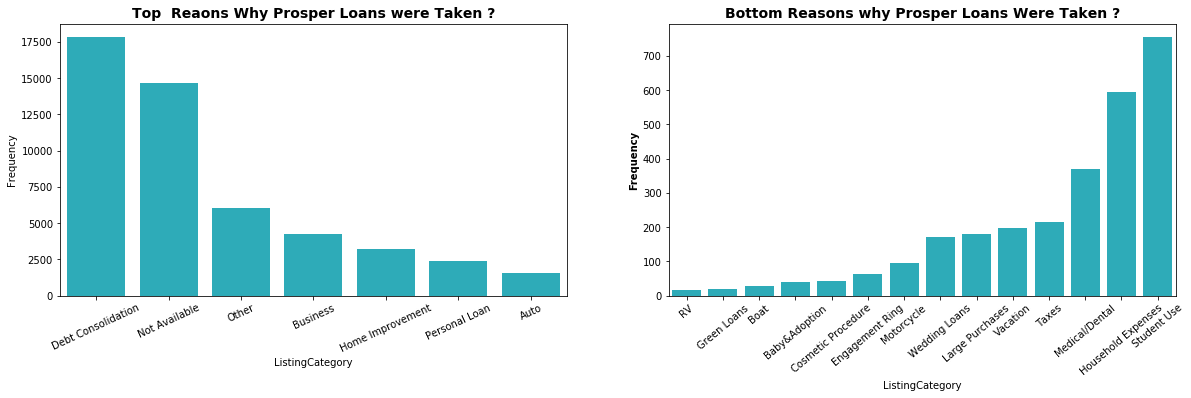

In [8]:
base_color=sb.color_palette()[-1]
cat_order=loan_var['ListingCategory'].value_counts().index

plt.figure(figsize = [20, 5])
# Top Reasons why loans were Taken will be on the left
plt.subplot(1, 2, 1)
sb.countplot(data=loan_var,x='ListingCategory',color=base_color,order=cat_order[:7])
plt.title('Top  Reaons Why Prosper Loans were Taken ?',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency')
plt.xticks(rotation=25);
# # Bottom Reasons why loans were Taken will be on the right
plt.subplot(1, 2, 2)
sb.countplot(data=loan_var,x='ListingCategory',color=base_color,order=cat_order[7:][::-1])
plt.title('Bottom Reasons why Prosper Loans Were Taken ?',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency',fontsize = 10, fontweight ='bold')
plt.xticks(rotation=40);

###  *LoanOutcome Variable*

**How Often Do Prosper loans Get Completed ?**<br>
    
Approximately 70% of The Time Loans were completed ,while 20% of the time They were Charged off and 9% of the time 
    Borrowers Default on the loan and loans were only cancelled 5 Times in This Dataset.

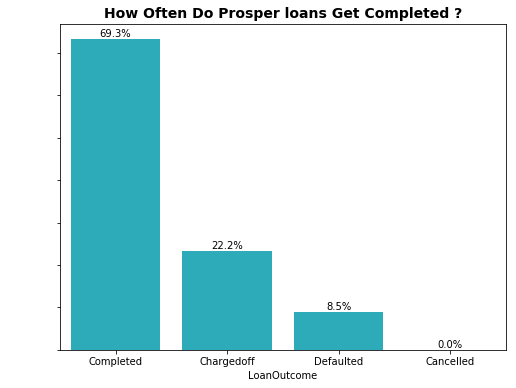

In [9]:
total=loan_var['LoanOutcome'].value_counts().sum()
outcome = loan_var['LoanOutcome'].value_counts()
plt.figure(figsize=(8,6))
sb.countplot(data=loan_var, x='LoanOutcome', color=base_color, order=outcome.index);
plt.yticks(color='w')

plt.title('How Often Do Prosper loans Get Completed ?',fontsize = 14, fontweight ='bold')
plt.ylabel(' ');
# Recalculating the type_counts just to have clarity.


# get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = outcome[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total)

    # print the annotation just below the top of the bar
    plt.text(loc, count+300, pct_string, ha = 'center', color = 'black')


#### *EmploymentStatus And IncomeRange Variables*
**What Are The Income Range And EmploymentStatus of Prosper Loan Borrowers ?**
    
**EmploymentStatus:** <br>

Borrowers That took Prosper Loans are mostly Employed ,be its a Full Time or Part  Time Job,or Them being Self Employed.
    Also while they are few In numbers ,retired People also Took prosper Loans,while an Handful of Borrowers
    filled Not Available and Other as Their Employment Status. 
<br>

**IncomeRange** <br>
    
large Proportion  Of Borrowers Falls Into The  $25000-49000 and $50000-75000 Income Range ,while Over 7k Borrowers
    IncomeRange shows Not Displayed.Over 6K Borrowers Earn between $75000-$99999 and also over 6K Borrowers Earn More 
    Than 100k+ Dollars.
    4.5k Borrowers Earn between $1-$24999  ,while  Over 600 Earns Zero Dollar and 532 of The Borrowers 
    Have Not Employed as Their IncomeRange.

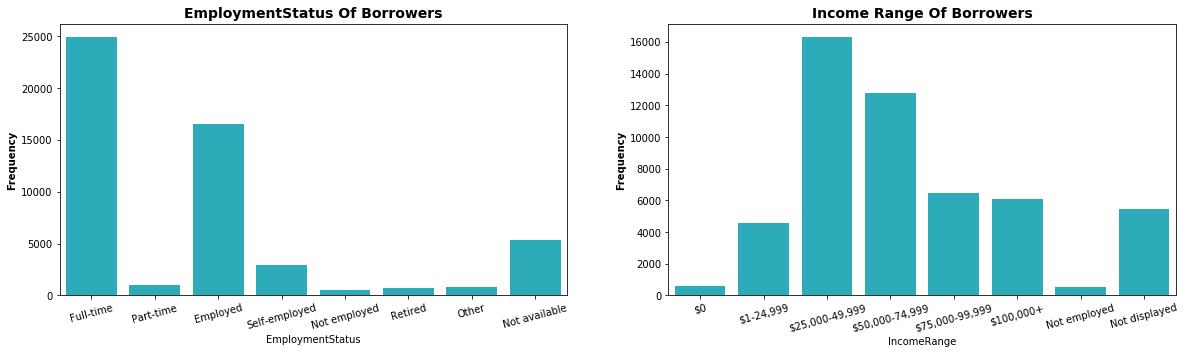

In [10]:
plt.figure(figsize = [20, 5])
# EmploymentStatus on the left
plt.subplot(1, 2, 1)
sb.countplot(data=loan_var,x='EmploymentStatus',color=base_color)
plt.title('EmploymentStatus Of Borrowers',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency',fontsize = 10, fontweight ='bold')
plt.xticks(rotation=15);
# Income Range on The right
plt.subplot(1, 2, 2)
sb.countplot(data=loan_var,x='IncomeRange',color=base_color)
plt.title('Income Range Of Borrowers',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency',fontsize = 10, fontweight ='bold')
plt.xticks(rotation=15);


### *Term Variable*    
    
**How Long Does It Take To Complete a Prosper Loan?**<br>

The Term Variable which states The Allocated Month for a loan to be Completed Takes 3 values, which are ;
    12 months , 36 months and 60 months , with The Most Allocated Month for  a Prosper Loan been 36 Months(3 Years ),
    followed by  60 Months(5years) Then 12 months(a Year).It will be lovely to see how this fare against The LoanOutcome 
    variable.
    

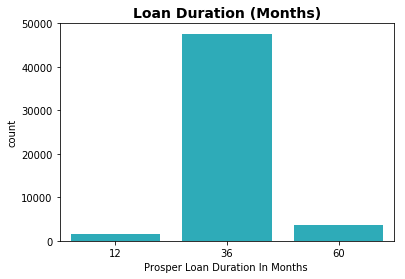

In [11]:
sb.countplot(data=loan_var,x='Term',color=base_color)
plt.title('Loan Duration (Months)',fontsize = 14, fontweight ='bold')
plt.xlabel('Prosper Loan Duration In Months ');

### *IsBorrowerHomeOwner*
**How many Borrowers are HomeOwner ?**<br>

    The Proportion of Borrowers That owns a home is about even with Borrowers that doesnt .

False    27527
True     25294
Name: IsBorrowerHomeowner, dtype: int64


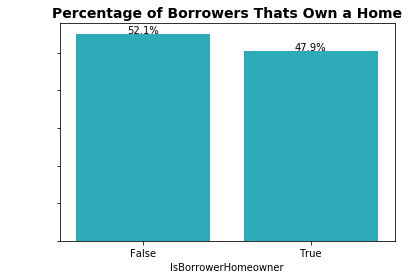

In [12]:
count= loan_var['IsBorrowerHomeowner'].value_counts()
print(count)
total=count.sum()
plt.figure(figsize=(6,4))
sb.countplot(data=loan_var, x='IsBorrowerHomeowner', color=base_color, order=count.index);
plt.yticks(color='w')

plt.title('Percentage of Borrowers Thats Own a Home',fontsize = 14, fontweight ='bold')
plt.ylabel(' ');

for i in range (count.shape[0]):
    val = count.values[i]
    pct_string = '{:0.1f}%'.format(100*val/total)
    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, val+40, pct_string, ha = 'center');

### *Recommendations*
**How Many Recommendations does a Borrower gets ?**<br>

Over 90% of the Borrowers had zero Recommendations at the time  the listing was created ,while majority of the borrowers 
    had zero Recommendations, some borrowers did have over 10 recommendations. 

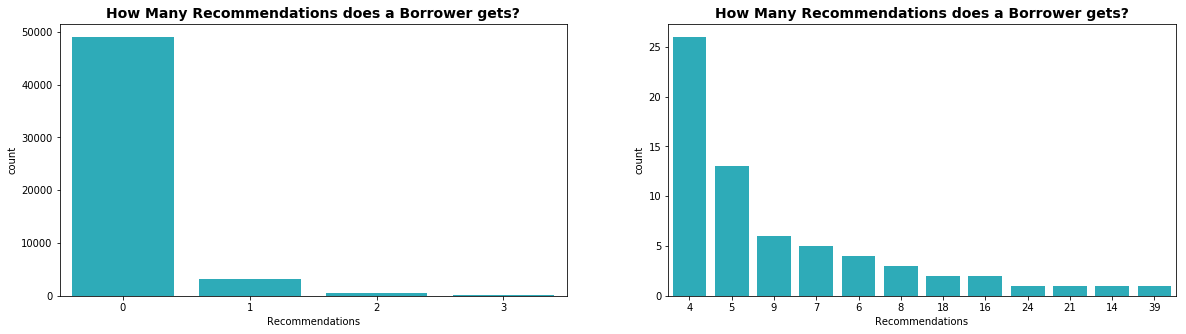

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
count_order=loan_var['Recommendations'].value_counts().index
sb.countplot(data=loan_var,x='Recommendations',order=count_order[:4],color=base_color)
plt.title('How Many Recommendations does a Borrower gets?',fontsize=14,fontweight='bold');

plt.subplot(1,2,2)
count_order=loan_var['Recommendations'].value_counts().index
sb.countplot(data=loan_var,x='Recommendations',order=count_order[4:],color=base_color);
plt.title('How Many Recommendations does a Borrower gets?',fontsize=14,fontweight='bold');

### *StatedMonthlyIncome*
**How Much Does Prosper Loan Borrowers earn monthly?.** <br>
    
    Majority Of Prosper Loan Borrowers Earn between $2000 and $10000 monthly,494 Borrowers Earn Above $20k.


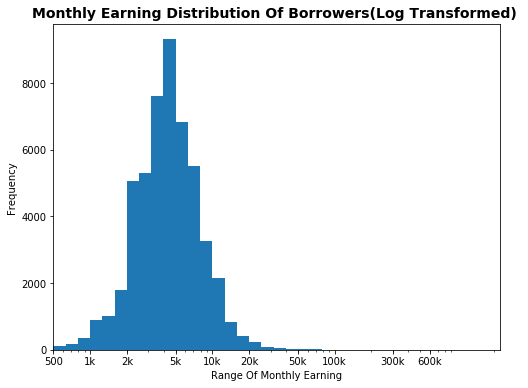

In [14]:
loan_var['MonthlyIncome']=loan_var['StatedMonthlyIncome']+0.1
plt.figure(figsize=(8,6))
bins = 10 ** np.arange(-1, 6+0.1, 0.1)
loan_var['MonthlyIncome'].plot(kind='hist',bins=bins)
plt.title('Monthly Earning Distribution Of Borrowers(Log Transformed) ',fontsize = 14, fontweight ='bold')
plt.xlabel('Range Of Monthly Earning')
#plt.xlabel('Price(USD)');
# Bin size
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4,5e4,1e5,3e5,6e5], [500, '1k', '2k', '5k', '10k', '20k','50k','100k','300k','600k'])
# plt.xlim(1e2,1e4);
plt.xlim(500,);



### *LoanOriginalAmount & MonthlyLoanPayment*
**How Much Loan Do Borrowers take and How much do They Pay  back Monthly?**

    Prosper Loan offers loan between $1k and $35K,while most Borrowers Take Loans between $1k to $10k 

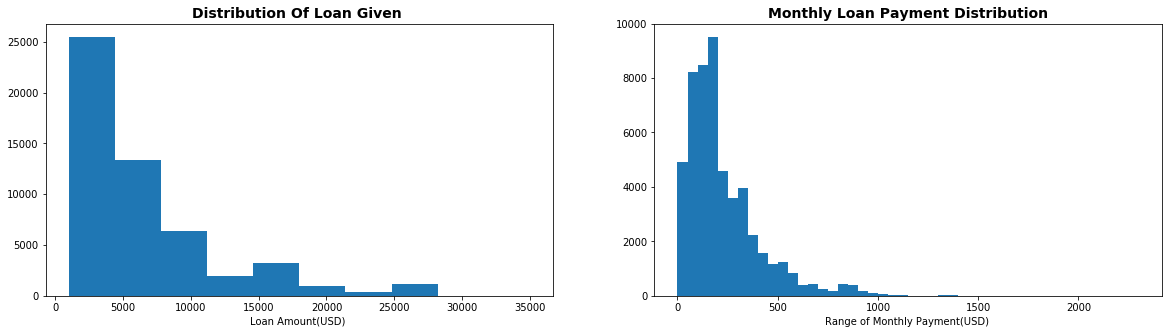

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(data=loan_var,x='LoanOriginalAmount')
plt.title('Distribution Of Loan Given ',fontsize = 14, fontweight ='bold')
plt.xlabel('Loan Amount(USD) ');


plt.subplot(1,2,2)
bins=np.arange(0,loan_var['MonthlyLoanPayment'].max()+50,50)
plt.hist(data=loan_var,x='MonthlyLoanPayment',bins=bins)
plt.title('Monthly Loan Payment Distribution',fontsize = 14, fontweight ='bold');
plt.xlabel('Range of Monthly Payment(USD) ');

# plt.xlim(1,1000);

### *DebtToIncomeRatio ( DTI )*
**What Proportion Of Borrowers Have a good DebtToIncomeRatio?**

 Most Borrowers have a Good DTI value that falls between 0 and 0.4 ,while Borrowers with a zero DTI value alongside 
    Borrowers with a DTI value Greater 1 lack The Documents to back their Income,Picked mostly Not Available as their
    Listing Category ,over 500 of them  have zero recommendations and only half of the loans from them were completed. 

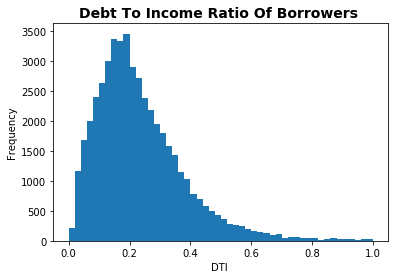

In [16]:

loan_var=loan_var.query('DebtToIncomeRatio<=1')
bins=np.arange(0,loan_var['DebtToIncomeRatio'].max()+0.02,0.02)
loan_var['DebtToIncomeRatio'].plot(kind='hist',bins=bins)
plt.title('Debt To Income Ratio Of Borrowers ',fontsize = 14, fontweight ='bold')
plt.xlabel('DTI ');

###  *IsBorrowerHomeowner By LoanOutcome*
 Owning a Home Doesnt Influence  loan Outcome directly in the very least ,will look to visualize these two variables 
    with another variable in the multivariate section .

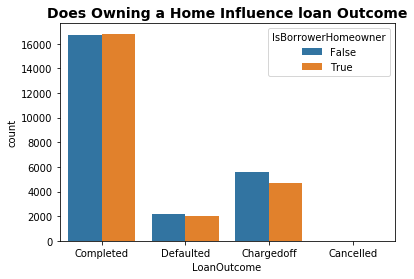

In [17]:
sb.countplot(data = loan_var, x = 'LoanOutcome', hue = 'IsBorrowerHomeowner')
plt.title('Does Owning a Home Influence loan Outcome',fontsize = 14, fontweight ='bold');

###  *DTI & LoanOutcome*
**Does DTi influence Loan Completion** <br>

 DTI of most  Borrowers with Completed loans are in the range of 0.1 and 0.3 with a median of 0.2 while Defaulted and 
    ChargedOff loan DTI are a little  higher than that with a wider range.
    The Mean Of Each LoanOutcome Varies with The lowest mean(Best mean) coming from the completed loan with a value around
    0.21 almost the same as Its Median value.

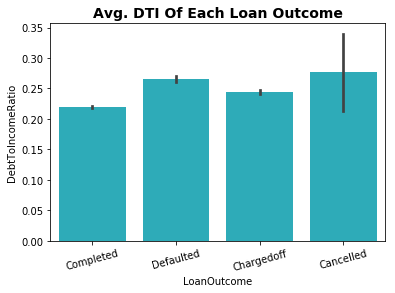

In [18]:
sb.barplot(data=loan_var, x='LoanOutcome', y='DebtToIncomeRatio', color=base_color)
plt.xticks(rotation=15);
plt.title('Avg. DTI Of Each Loan Outcome',fontsize=14,fontweight='bold');

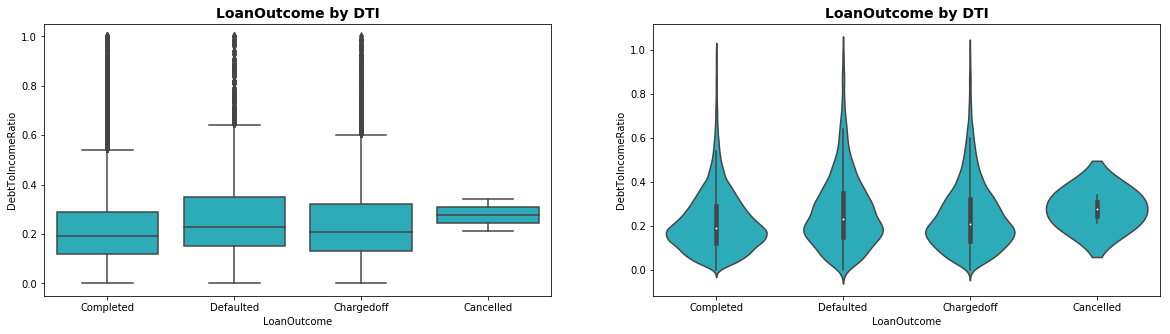

In [19]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sb.boxplot(data=loan_var, x='LoanOutcome', y='DebtToIncomeRatio', color=base_color)
plt.title('LoanOutcome by DTI', fontsize=14,fontweight='bold');

plt.subplot(1,2,2)
sb.violinplot(data=loan_var, x='LoanOutcome', y='DebtToIncomeRatio', color=base_color)
plt.title('LoanOutcome by DTI', fontsize=14,fontweight='bold');

### *LoanOutcome By Listing Category*
**Does The ListingCategory a Borrower Falls Under Influence Their Loan Outcome?**

  
  While all ListingCategories Have Completed Loans as The highest frequency in each cluster ,It is to be noted that 
    The Not available ListingCategory have most Defaulted Loan while The literal 'Other' ListingCategory has a 
    significantly less Defaulted Loans.Borrowers who took loan for Auto,Boat,Rv,MotorCycle have to little or no defaulted
    loans with a high completion rate .

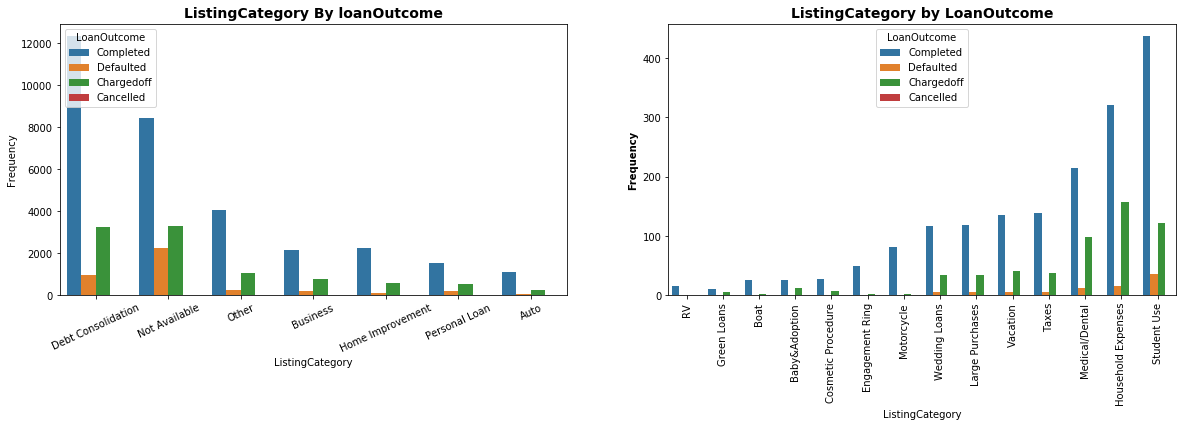

In [20]:
plt.figure(figsize = [20, 5])
# Top Reasons why loans were Taken will be on the left
plt.subplot(1, 2, 1)
sb.countplot(data=loan_var,x='ListingCategory',hue='LoanOutcome',order=cat_order[:7])
plt.title('ListingCategory By loanOutcome',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency')
plt.xticks(rotation=25);
# # Bottom Reasons why loans were Taken will be on the right
plt.subplot(1, 2, 2)
sb.countplot(data=loan_var,x='ListingCategory',hue='LoanOutcome',order=cat_order[7:][::-1])
plt.title('ListingCategory by LoanOutcome',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency',fontsize = 10, fontweight ='bold')
plt.xticks(rotation=90);

###  *Term by LoanOutcome*
**Does The Duration of a loan Influence It completion?** <br>

  While The 12 Month Term has the Lowest Frequency among The Terms Duration (12,36,64),It is The One with 
    the lowest amount of Defualts , followed by 60 Months Term Loan .


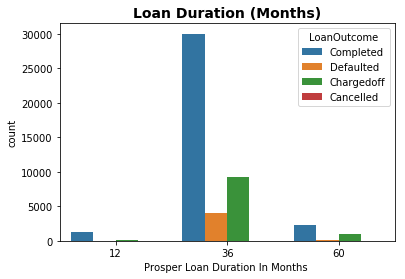

In [21]:
sb.countplot(data=loan_var,x='Term',hue='LoanOutcome')
plt.title('Loan Duration (Months)',fontsize = 14, fontweight ='bold')
plt.xlabel('Prosper Loan Duration In Months ');

### *Recommendations & LoanOutcome*
**Does The Number of Recommendations a Borrower has influence The LoanOutcome Variable?** <br>
    
 While Most Borrowers had zero Recommendations majority of them(over 30k) completed Their Loans ,and an handful of them 
    (Over 4k)Defaulted.Borrowers with exactly 1 Recommendation have most loans completed ,and a very small amount of 
    Borrowers Defaulted.Borrowers With 14 or more recommendations all completed their loans and no Default loans stem 
    from them.One Could say The more Recommendations a Borrower has ,The lower the Chances they will bail out on a loan.
    will look to see how these two variables fare against IsBorrowerHomeOwner In The Multivariate Section of this analysis

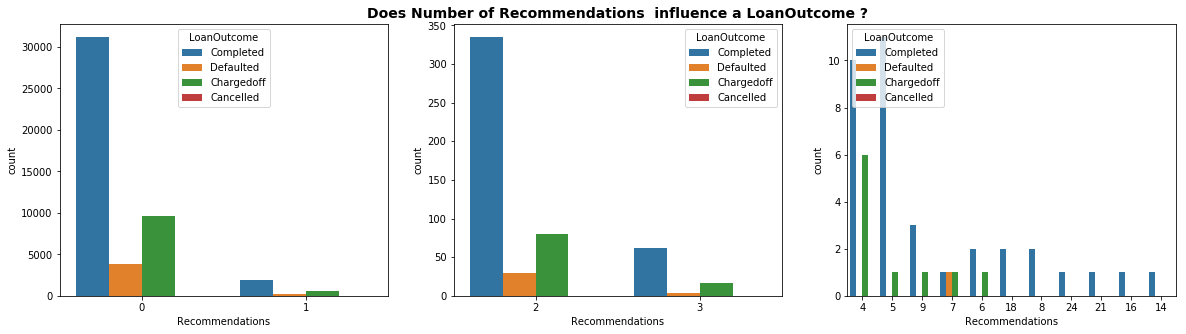

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.count_order=loan_var['Recommendations'].value_counts().index
sb.countplot(data=loan_var,x='Recommendations',order=count_order[:2],hue='LoanOutcome')
plt.title(' ',fontsize=14,fontweight='bold');

plt.subplot(1,3,2)
count_order=loan_var['Recommendations'].value_counts().index
sb.countplot(data=loan_var,x='Recommendations',order=count_order[2:4],hue='LoanOutcome')
plt.title('Does Number of Recommendations  influence a LoanOutcome ?',fontsize=14,fontweight='bold');

plt.subplot(1,3,3)
count_order=loan_var['Recommendations'].value_counts().index
sb.countplot(data=loan_var,x='Recommendations',order=count_order[4:],hue='LoanOutcome')
plt.title(' ',fontsize=14,fontweight='bold');

### *LoanOriginalAmount  & LoanOutcome*
**Does Amount of Loan taken Influence a loan Outcome ?** <br>
    
Loan Amount Doesnt Influence a Loan Outcome at least not explicitly, will see how these two variables fare against 
    other Variables such as IsBorrowerHomeowner and Recommendations. 

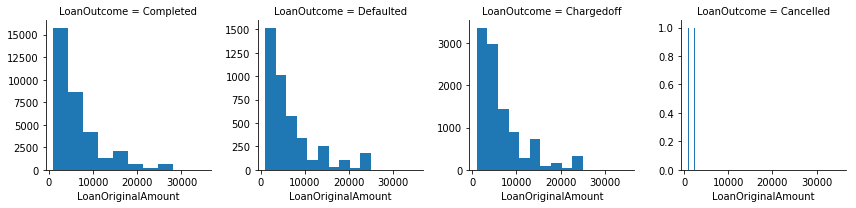

In [23]:
# bins=np.arange(0,loan_var['DebtToIncomeRatio'].max()+0.02,0.02)
g = sb.FacetGrid(data = loan_var, col = 'LoanOutcome',sharey=False)
g.map(plt.hist,'LoanOriginalAmount');
# plt.xlim(0,1);

### *EmploymentStatus & IncomeRange by LoanOutcome*
**Does Employment Status and Income Range Influence a Loan Outcome** <br>
    
16k5 Borrowers That are full Time employed completed their loan , while 2k Borrowers from This Category Defaulted on
    their loan.The Employed Category has over 11k completed Loans with a very low default rate .With respect to The rate 
    of Completed Loans per loan defaults ,The Not available EmploymentStatus has the higheest rate of Defaults .
    Borrowers Earning Between $75k to over $100k alongside Borrowers Earning Between 1 to 24.9k Have a Good Completion 
    rate with a small amount of Borrowers Defaulting On Their Loans.The Not Displayed Income Range have The Highest 
    Rate of Defaults Compared to how many loans were completed .
    
    

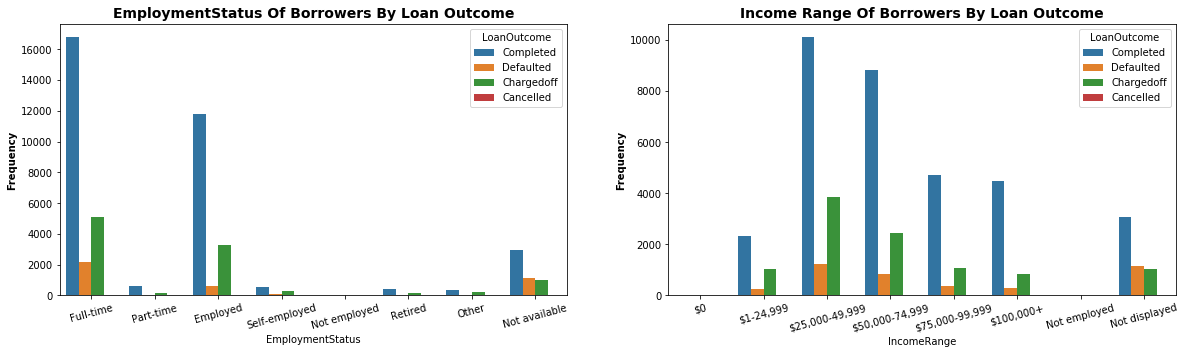

In [24]:
plt.figure(figsize = [20, 5])
# EmploymentStatus on the left
plt.subplot(1, 2, 1)
sb.countplot(data=loan_var,x='EmploymentStatus',hue='LoanOutcome')
plt.title('EmploymentStatus Of Borrowers By Loan Outcome',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency',fontsize = 10, fontweight ='bold')
plt.xticks(rotation=15);
# Income Range on The right
plt.subplot(1, 2, 2)
sb.countplot(data=loan_var,x='IncomeRange',hue='LoanOutcome')
plt.title('Income Range Of Borrowers By Loan Outcome',fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency',fontsize = 10, fontweight ='bold')
plt.xticks(rotation=15);


### *DTI & Recommendations*
**DTI distribution By number of Recommendations** <br>
    
    Borrowers DTI gets Better(Smaller) with Increase in Number of Recommendations. 

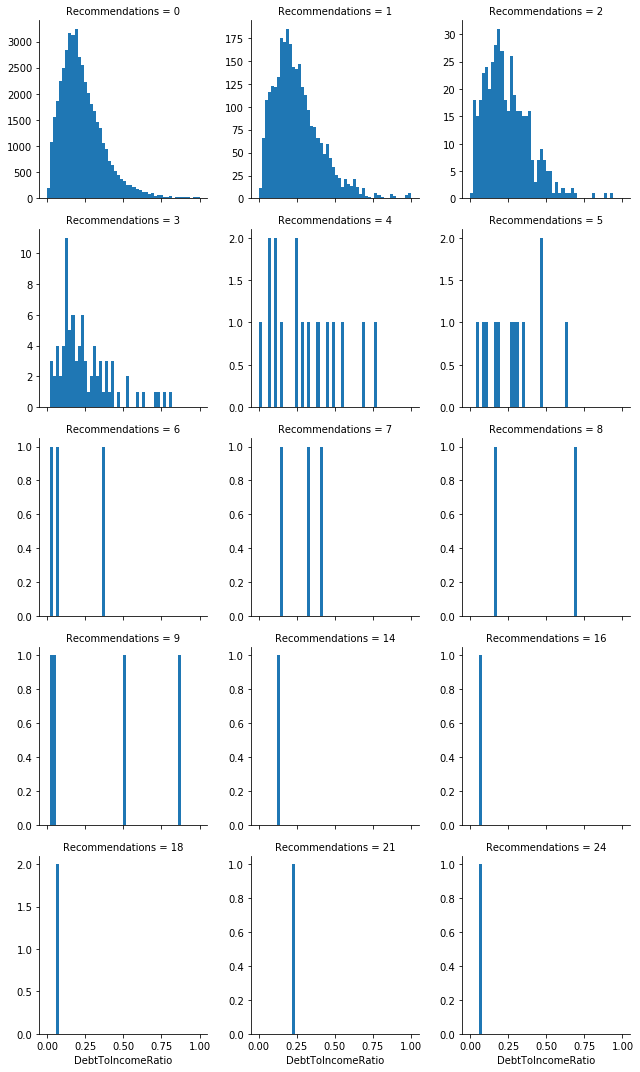

In [25]:
bins=np.arange(0,loan_var['DebtToIncomeRatio'].max()+0.02,0.02)
g = sb.FacetGrid(data = loan_var, col = 'Recommendations',sharey=False,col_wrap=3)
g.map(plt.hist, "DebtToIncomeRatio",bins=bins);


### *MonthlyLoanPayment vs LoanOriginalAmount By LoanOutcome* 

 Each Loan outcome have a distinct pattern to them.Defaulted and Charged off loans have a max LoanOriginalAmount of 
    about 25k dollars and a max MonthlyLoanPayment of about 1k dollarsb,for Completed loans these boundaries are shattered ,
    LoanOriginalAmount extends to over 35k dollars with a max MonthlyLoanPayment of over 2k dollars .

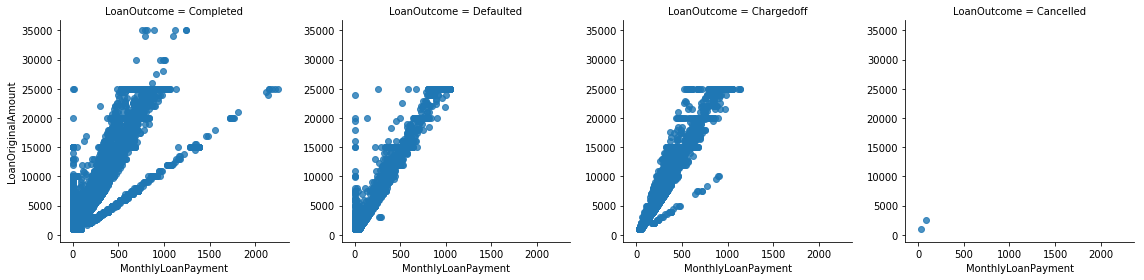

In [26]:
g = sb.FacetGrid(data = loan_var, col = 'LoanOutcome', size = 4)
g.map(sb.regplot,'MonthlyLoanPayment' ,'LoanOriginalAmount',fit_reg=False);

###  *IsBorrowerHomeowner* 
    
  Borrowers that owns a home and Borrowers who dont have about the same distribution ,but an handful of 
    Borrowers that takes loan ranging from 25k to over 35k dollars are HomeOwners with a High Completion Rate.

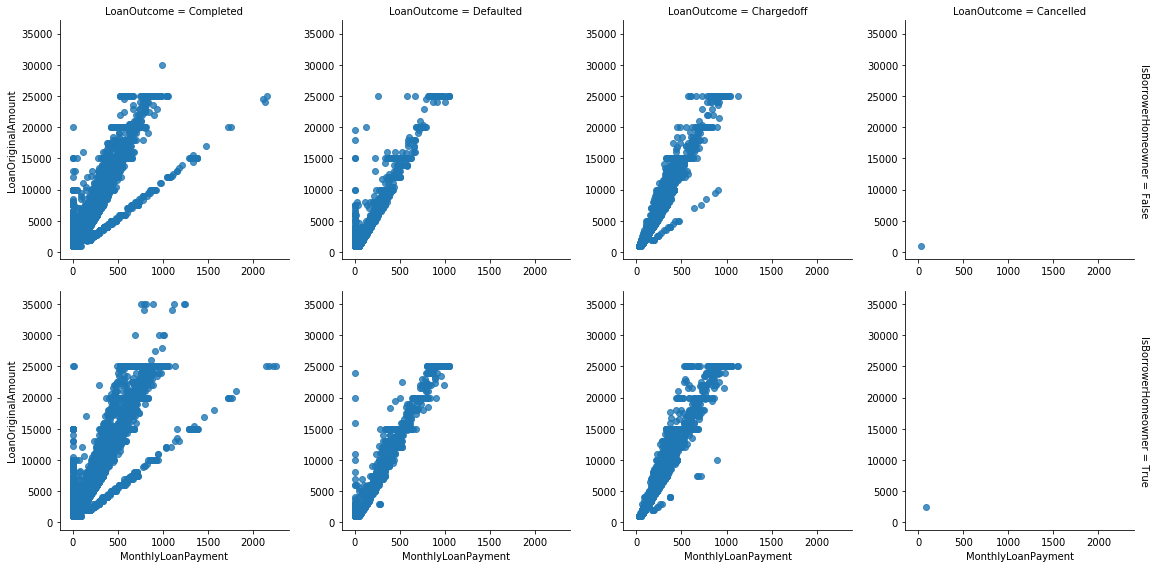

In [27]:
# Facetting The previous scatter plot by the IsBorrowerHomeowner variable
g = sb.FacetGrid(data = loan_var, col = 'LoanOutcome',row='IsBorrowerHomeowner', size = 4,margin_titles = True)
g.map(sb.regplot,'MonthlyLoanPayment' ,'LoanOriginalAmount',fit_reg=False);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 845287 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/